# Point Estimation

#### Let's see how population mean is estimated by the sample mean

A non-profit organization sampled the files of the local forest department to come up with the following amounts (in thousands of dollars) of damages for 10 wildfire incidents:

120, 55, 60, 10, 8, 150, 44, 58, 62, 123

What is the estimate of the average amount of damage in wildfires, in that area?

In [3]:
sample = np.array([120, 55, 60, 10, 8, 150, 44, 58, 62, 123])

x_bar = np.mean(sample)
x_bar

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

69.0

#### Insight
* The estimate of the average amount of damages in wildfires in that area is $69000.

Usually, point estimate of an unknown population parameter is the corresponding sample statistic. 

For example:

a. Population mean μ is estimated by the sample mean x̅.

b. Population median is estimated by the sample median x̃.

c. Population proportion of success π is estimated by the sample proportion of success p.

# Confidence Interval

#### **Let's see how confidence interval is constructed for the population mean when std dev is known**

It is rarely the case when you know the population standard deviation and not the mean. However, it may not be as unlikely an assumption as it seems. For a tight manufacturing process which is in place for a long time, the variability in the process may be controlled, but with small changes in temperature or humidity, the mean may change.


Let's construct the confidence interval for an example where the population mean is unknown and the standard deviation is known.



The caffeine content (in mg) was examined for a random sample of 50 cups of black coffee dispensed by a new coffee machine. The mean of the sample is found to be 110 mg. It is known that the standard deviation from all the machines of that manufacturer is 7 mg. Construct a 95% confidence interval for μ, the mean caffeine content for cups dispensed by the machine.




In [6]:
from scipy.stats import norm

x_bar, sigma = 110, 7

n = 50

#sigma / np.sqrt(n) -> standart error
# std is for one point of dataset
# ste is for the average of the dataset
np.round(norm.interval(0.95, loc=x_bar, scale=sigma / np.sqrt(n)), 2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([108.06, 111.94])

In [18]:
x_bar, sigma = 160.9, 6

n = 50

np.round(norm.interval(0.95, loc=x_bar, scale=sigma/np.sqrt(n)),2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([159.24, 162.56])

#### Insight
* 95% of the time, the mean caffeine content for cups of coffee dispensed by the machine will be between 108.06 mg and 111.94 mg.

#### **Let's see how confidence interval is constructed for the population mean when std dev is unknown**

The example discussed above is based on the assumption that the population standard deviation is known. However, in the majority of cases, that assumption will not be satisfied.

When we do not know the population standard deviation, it can be estimated from the sample. In this case, the sample mean follows Student's t distribution with (n-1) degrees of freedom. 

Just like the normal distribution, t-distribution is also very useful in statistical inference. It is a symmetric distribution around 0. For a very large d.f., the t distribution is almost identical to the standard normal distribution.The parameter of t-distribution is known as degrees of freedom.

Below is the graph of t-distribution for various degrees of freedom(k). We can notice that the distribution approximates to normal as the value of k increases.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

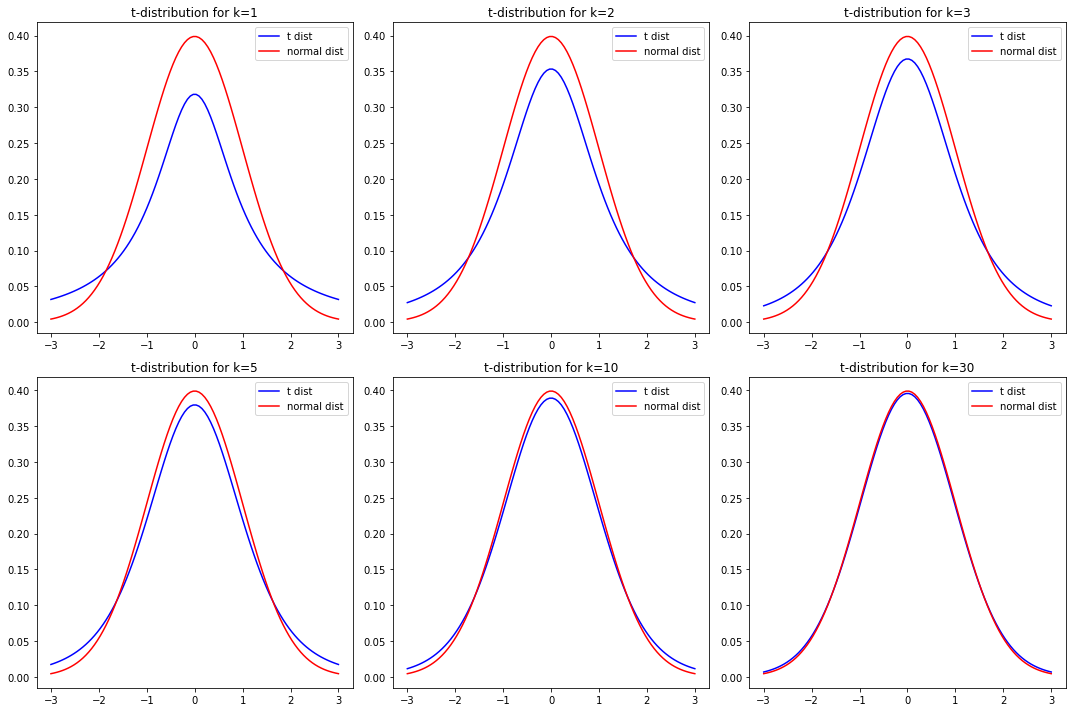

In [8]:
from scipy.stats import t
from scipy.stats import norm

x = np.linspace(-3, 3, 100)

fig, axes = plt.subplots(2,3, sharex=False, sharey=False, figsize=(15,10))
axes = axes.ravel()

for i, k in zip(range(6), [1,2,3,5,10,30]):
    ax=axes[i]
    ax.plot(x, t.pdf(x, df=k), color='blue', label='t dist')
    ax.plot(x, norm.pdf(x), color='red', label='normal dist')
    ax.set_title('t-distribution for k={0}'.format(k))
    ax.legend(loc='upper right', fontsize=10)
    
plt.tight_layout()

Let's use the t-distribution to construct the confidence interval for the mean when population standard deviation is unknown.

The caffeine content (in mg) was examined for a random sample of 50 cups of black coffee dispensed by a new machine. The mean of the sample is found to be 110 mg and the sample standard deviation is estimated to be 7 mg. Construct a 95% confidence interval for μ, the mean caffeine content for cups dispensed by the machine.

In [9]:
from scipy.stats import t

x_bar, s = 110, 7

n = 50
k = n - 1

np.round(t.interval(0.95, df=k, loc=x_bar, scale= s/np.sqrt(n)),2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([108.01, 111.99])

#### Insight
* 95% of the time, the mean caffeine content for cups of coffee dispensed by the machine will be between 108.01 mg and 111.99 mg.

#### Key Takeaways

* The confidence interval for the population mean can be constructed for both cases when the population standard deviation is known and when it is unknown. The latter case is more common which demands the application of t-distribution with appropriate degrees of freedom.


* The general approach to the construction of confidence interval is to use the appropriate sample statistic to estimate the population parameter and use the proper percentile point of the sampling distribution.